In [33]:
import sys
sys.path.append('/Users/zhengj10/Python/Modules')
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
import yaml
import pandas as pd
import PatcherBot as pb
from glob import glob
import seaborn as sns
from scipy.stats import mannwhitneyu


In [34]:
imgPath = '/Volumes/Backup Plus/PatcherBot/raw/'
# imgPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/'
sumPath = '/Volumes/genie/Jihong_GENIE_stuff/Voltron 2 with_pos_to_neg_V_steps/'


### Plot

In [35]:
# df = pd.read_pickle(sumPath+'summary.pkl')
df = pd.read_pickle(sumPath+'Summary_pos_to_neg_VC_500_lowest_p_val.pkl')
df.shape


(390, 13)

In [36]:

# df = df.drop(278)
# df[df.Mutation=='421.1076']

In [37]:
threshold = {'leak':-300, 'Ra':50}

In [38]:
df_p = df[(df.Leak_min>threshold['leak'])&(df.Ra_max<threshold['Ra'])]
df_p.shape


(339, 13)

- FV curve

In [39]:
df_p.Mutation.unique()

array(['421.1', '421.2096', '476.4495', '476.1', '487.1', '421.3012',
       '487.6', '421.3028', '421.2336', '421.2203', '421.3067',
       '421.5649', '557.1', '557.2', '558.1', '421.4909', '421.5657',
       '421.5616', '421.6051', '421.5951', '421.4919', '421.4892',
       '421.5658', '421.6052', '421.4876', '421.5650', '421.6155',
       '421.5952', '421.4911', '421.5152', '421.5387', '421.5414',
       '421.5448', '421.5617', '421.5751', '421.1069', '421.1076',
       '421.3054', '421.3167', '421.4850', '421.4875', '421.4882',
       '421.4910', '421.5760', '421.6053', '421.5462', '421.5659',
       '421.6004', '421.6038', '421.4925', '421.6138', '421.5619',
       '558.2'], dtype=object)

In [40]:
labels_dict = {
    # Voltron and Voltron 2
    '421.1':'Voltron',
    '421.2096':'Voltron 2',
    '476.4495': 'Voltron 2-ST',
    
    # Voltron Combo mutants
    '421.4909':'Voltron N69E R78H A122D V196P',
    '421.4919':'Voltron R78H A122D V196P',
    '421.4876':'Voltron N69E A122D',
    '421.4892':'Voltron N69E V196P',
    '421.6051':'Voltron R78H L89C A122D V196P',
    '421.5649':'Voltron Y63L N69E L89C A122D',
    '421.6052':'Voltron Y63L L89C A122D V196P',
    '421.5658':'Voltron Y63L L89C A122D',
    '421.4951':'Voltron Y63L V74W L89T',
    '421.5657':'Voltron R78H L89C A122D',
    '421.5659':'Voltron L89C A122D',
    '421.5650':'Voltron N69E L89C A122D',
    '421.5657':'Voltron R78H L89C A122D',
    '421.5616':'Voltron V74E L89C',
    '421.5619':'Voltron Y63L L89C',
    '421.5658':'Voltron Y63L L89C A122D',
    '421.5649':'Voltron Y63L N69E L89C A122D',
    '421.5462':'Voltron N69E R78H N81S L89C A122D',
    '421.5951':'Voltron R78H N81S L89C A122D',
    '421.6051':'Voltron R78H L89C A122D V196P',
    '421.5922':'Voltron Y63L A122D V196P',
    '421.6052':'Voltron Y63L L89C A122D V196P',
    '421.6004':'Voltron Y63L N69E N81S',
    '421.6155':'Voltron Y63L L89T A122D V196P',
    '421.5952':'Voltron Y63L N81S L89C A122D',
    '421.5444':'Voltron Y63L R78H A122D V196P',
    '421.5953':'Voltron V74W R78H N81S L89C A122D',
    '421.6232':'Voltron Y63L V74E N81S',
    '421.5076':'Voltron Y63L N69E R78H N81S L89C',
    '421.5740':'Voltron V74E R78H N81S V196P',
    '421.4911':'Voltron N69E A122D V196P',
    '421.5152':'Voltron N69E V74W R78H N81S L89C A122H V196P',
    '421.5387':'Voltron V74E R78H L89C V196P',
    '421.5414':'Voltron V74W R78H L89C A122H V196P',
    '421.5448':'Voltron R78H A122H V196P',
    '421.5617':'Voltron Y63L R78H L89C',
    '421.5751':'Voltron N69E R78H N81S A122D V196P',
    '421.4850':'Voltron N69E R78H',
    '421.4875':'Voltron Y63L N69E R78H A122D',
    '421.4882':'Voltron R78H A122D',
    '421.4910':'Voltron Y63L N69E A122D V196P',
    '421.5760':'Voltron R78H N81S A122D V196P',
    '421.6053':'Voltron L89C A122D V196P',
    '421.6038':'Voltron Y63L N69E R78H L89C A122D V196P',
    '421.4925':'Voltron N69E R78H A122H V196P',
    '421.6138':'Voltron N69E R78H A122D',
    '421.5619':'Voltron Y63L L89C',
    
    # Voltron Single mutants
    '421.2907':'Voltron A122X',
    '421.2335':'Voltron Y63P',
    '421.2336':'Voltron Y63T',
    '421.2346':'Voltron Y63I',
    '421.3002':'Voltron V74D',
    '421.3046':'Voltron V74S',
    '421.3028':'Voltron V74W',
    '421.303':'Voltron Y146X',
    '421.3012':'Voltron V74G',
    '421.2379':'Voltron Y63K',
    '421.2347':'Voltron Y63D',
    '421.3067':'Voltron V74H',
    '421.2203':'Voltron R78N',
    '421.3006':'Voltron V74P',
    '421.1069':'Voltron N69E',
    '421.1076':'Voltron N69P',
    '421.3054':'Voltron N74E',
    '421.3167':'Voltron L89T',

    # ASAP1 variants
    '376.1':'ASAP1',
    '376.13':'ASAP1 (T392V)',
    
    # ASAP3b variants
    '414.1':'GS-ASAP3b',
    '376.20950':'ASAP3b (T392V)',
    '376.20949':'ASAP3b (T392Y)',
    '485.20950':'ASAP3b (T392V)-ST',
    '376.20948':'ASAP3b',
    '485.20949':'ASAP3b (T392Y)-ST',
    '485.6':'ASAP3b-ST',
    '376.17995':'ASAP3b N391L T392I',
    '376.18153':'ASAP3b N391I T392V',
    '533.1':'ASAP3b-Kv',
    
    # Amy's Feb batch of ASAP3b variants
    'ASAP3b.T392V.H':'pCAG0–ASAP3b (T392V)-NL-SOM2 (Lin)',
    'ASAP3b.T392V.G':'pCAG0–ASAP3b (T392V)-lTlcnC',
    'ASAP3b.T392V.F':'pCAG0–ASAP3b (T392V)-NL-SOM2 (GENIE)',
    'ASAP3b.T392V.I':'pCAG0–ASAP3b (T392V)-GSS3-SOM2-lTlcnC',
    'ASAP3b.T392V.J':'376.2095 / pCAG-ASAP3b (T392V)',
    'ASAP3b.T392V.C':'pCAG0–ASAP3b (T392V)-GSSlong-SOM2 (GENIE)',
    'ASAP3b.T392V.B':'pCAG0–ASAP3b (T392V)-KGC-GSS3-ER2-GSS3-SOM2 (GENIE)',
    'ASAP3b.T392V.A':'pCAG0–ASAP3b (T392V)-GSS3TR-SOM2 (GENIE)',
    'ASAP3b.T392V.E':'485.2095 / pCAG–ASAP3b (T392V)-TS-ER-SOM2',
    'ASAP3b.T392V.D':'533.1 / pCAG-ASAP3-Kv (Lin)',    
    
    # Amy's Jul batch of ASAP3b variants
    'N4':'ASAP3b (T392V)-TS-ER-SOM2 miniprep',
    'O5':'ASAP3b (T392V)-GSSlong-SOM2 (GENIE)',
    'M3':'ASAP3b (T392V)-NL-SOM2 (GENIE)',
    'L2':'ASAP3b (T392V)-GSS3-SOM2-lTlcnC',
    'Q7':'ASAP3b (T392V)-GSS3TR-SOM2 (GENIE)',
    'P6':'ASAP3b (T392V) maxiprep',
    'S9':'ASAP3b (T392V)-NL-SOM2 (Lin)',
    'T10':'pCAG-ASAP3b (T392V)-lTlcnC',
    'R8':'ASAP3b-TS-ER-SOM2 maxiprep',
    'W13':'ASAP3b (T392V) miniprep',
    'X14':'ASAP3-Kv (Lin) maxiprep',
    'Y15':'ASAP3b-TS-ER-SOM2 miniprep',
    'U11':'ASAP3-Kv (Lin) miniprep',
    'V12':'ASAP3b (T392V)-KGC-GSS3-ER2-GSS3-SOM2 (GENIE)',
    'K1':'ASAP3b (T392V)-TS-ER-SOM2 maxiprep',
    
    # Other Ace2N based sensors
    '487.1':'Ace2N-4AA-mNeon',
    '557.1':'CMV-VARNAM',
    '558.1':'CAG-VARNAM',
    '487.6':'Ace2N-4AA-mNeon A122D',
    '488.6':'Ace2N-4AA-mNeon A122D-ST',
    '558.2':'CAG-VARNAM A122D',
    '557.2':'CMV-VARNAM A122D'
}


In [41]:
df_sensor = df_p[df_p['Mutation'].isin(['557.1','557.2'])]

In [42]:
df_sensor

,Date,Plate,Well,Mutation,Cell,dFF,peak_dFF,Leak,Ra,Leak_min,Ra_max,Light_source,Power (%)
93,2021.03.18_000,plate_008,well_1,557.1,patch_attempt_0034_000,"[-0.04742702253253486, -0.026254270218126853, ...","[-0.0426859663864291, -0.029170949754698625, -...","[-87.90328618071538, -95.90649605962531, -109....","[21.942687312047717, 21.859256290885277, 21.79...",-150.598587,22.251507,Yellow,40
94,2021.03.18_000,plate_008,well_1,557.1,patch_attempt_0036_000,"[-0.1149563197791493, -0.08690775945474132, -0...","[-0.12269022427399047, -0.09017301709742154, -...","[-51.66533931804318, -50.509961074562625, -35....","[11.311661981632694, 9.427411727888035, 8.9878...",-51.665339,11.311662,Yellow,40
95,2021.03.18_000,plate_008,well_1,557.1,patch_attempt_0038_000,"[-0.09350009975351224, -0.05327628005976917, -...","[-0.10293480202469941, -0.07377842868480401, -...","[-29.462740019206706, -41.339770638204726, -65...","[19.922505393547596, 20.29816052441916, 20.761...",-65.141529,21.228895,Yellow,40
96,2021.03.18_000,plate_008,well_1,557.1,patch_attempt_0039_000,"[-0.07093418848429044, -0.05801480963606589, -...","[-0.07281917502243582, -0.06162363679855885, -...","[-6.6299195149526255, -13.552842969168733, -19...","[11.35988711128544, 10.141249732273279, 10.240...",-35.196446,11.359887,Yellow,40
97,2021.03.18_000,plate_008,well_1,557.1,patch_attempt_0040_000,"[-0.08190145135373215, -0.06853202963329595, -...","[-0.08684327291757384, -0.07126280703779679, -...","[-41.27402526424071, -75.39522912790606, -66.0...","[11.322752904202057, 9.40534644016093, 8.11697...",-208.006542,11.322753,Yellow,40
98,2021.03.18_000,plate_008,well_1,557.1,patch_attempt_0041_000,"[-0.10273287352908905, -0.08756302493287771, -...","[-0.10921034948487779, -0.09145800169200204, -...","[-10.696303171224619, -10.549504064362518, -18...","[19.939820340130595, 20.38020412648789, 20.407...",-33.940677,20.722410,Yellow,40
99,2021.03.18_000,plate_008,well_1,557.1,patch_attempt_0042_000,"[-0.09228622916966506, -0.07351210870779232, -...","[-0.0918867074274215, -0.07813986710420487, -0...","[-70.70603713916884, -78.90438838880588, -179....","[12.600135354602372, 12.89310019458625, 12.783...",-200.701554,13.516782,Yellow,40
100,2021.03.18_000,plate_008,well_1,557.1,patch_attempt_0043_000,"[-0.10258630878028115, -0.06306646122956786, -...","[-0.11699396679870616, -0.07318276335549698, -...","[-48.69390629760296, -21.14643368834344, -18.0...","[23.71577967965845, 23.82280382209186, 24.2620...",-48.693906,25.300826,Yellow,40
102,2021.03.18_000,plate_009,well_1,557.2,patch_attempt_0047_000,"[-0.07157418232847383, -0.05046684786875913, -...","[-0.07194930610999845, -0.053814764006325365, ...","[-165.24256292040394, -158.2858004137917, -145...","[14.75388409747633, 15.181588498701418, 15.336...",-178.926463,16.934825,Yellow,40
103,2021.03.18_000,plate_009,well_1,557.2,patch_attempt_0048_000,"[-0.0952209756561152, -0.07437382743848853, -0...","[-0.09819830670787619, -0.08122987836035254, -...","[-129.79823482409822, -135.8302114244698, -130...","[11.228959487555828, 9.352187489296469, 7.5565...",-161.998802,11.228959,Yellow,40


In [43]:
q = 0
F_zero = []
for i,r in df_sensor.iterrows():
#     if q>0:
#         continue
    dataFile = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell'],'camera_clamp1_000/000/Camera/frames.ma')
    imgData = h5py.File(dataFile,'r')
    imgData = imgData['data'][()]
    img_ctr = np.mean(imgData[100:200,234:274,:],axis=0)
    pix_sel = img_ctr>(np.max(img_ctr)-np.min(img_ctr))*0.3+np.min(img_ctr)
    f_zero = np.sum(pix_sel*img_ctr)/np.sum(pix_sel)
    print(imgData.shape)
    F_zero.append(f_zero)
    q += 1

    ax = plt.subplot(2,7,q)
    ax.imshow(pix_sel*img_ctr)
plt.axis('off')
plt.tight_layout()
plt.show()


OSError: Unable to open file (unable to open file: name = '/Volumes/Backup Plus/PatcherBot/raw/2021.03.18_000/plate_008/patch_attempt_0034_000/camera_clamp1_000/000/Camera/frames.ma', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [30]:
# df_sensor['F0'] = F_zero
df_sensor.loc[:,'F0'] = F_zero # add a new column without SettingWithCopyWarning


/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


ValueError: Must have equal len keys and value when setting with an iterable

In [32]:
len(F_zero)

13

In [31]:
len(df_sensor)

14

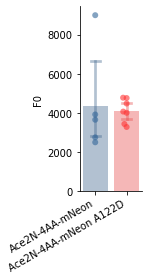

In [26]:
colors = ['#336699','#FF3333']

fig = plt.figure(figsize=(2,4))
ax  = plt.subplot(111)
sns.swarmplot(x="Mutation", y='F0', data=df_sensor, ax = ax, size=6, dodge=True, alpha=0.6, palette=colors)
ax1 = sns.barplot(x="Mutation", y='F0', data=df_sensor, ax = ax, alpha=0.4, palette=colors,capsize=0.3)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
# ylabel = value + ' (\u03BCm)'
# ax.set_ylabel(ylabel,size=12)
# ax.set_xlabel('Pipette #',size=12)

patches = ax.patches
lines_per_err = 3

for i, line in enumerate(ax.get_lines()):
    newcolor = patches[i // lines_per_err].get_facecolor()
    line.set_color(newcolor)
# plt.xticks([0,1], ['Ace2N-4AA-mNeon','Ace2N-4AA-mNeon A122D'], rotation=30, ha = 'right')
plt.xticks([0,1], ['CMV-VARNAM','CMV-VARNAM A122D'], rotation=30, ha = 'right')
ax1.set_xlabel('')
ax1.set_ylabel('F0')

plt.tight_layout()
# fig.savefig('/Users/zhengj10/Desktop/F0.png')
# fig.savefig('/Users/zhengj10/Desktop/F0_Ace2N.pdf',format='pdf')
plt.show()
